In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv, datetime
import matplotlib.dates as mdates
import os, sys
from sklearn.metrics import r2_score
from tqdm import tqdm


def MakeDataFromText(filepath):
    """
    Helper function to parse text files in IFM proprietary format.
    """
    with open(filepath, 'r') as file:
        reader = csv.reader(file)

        db = dict()                          # Dictionary that will hold k,v pairs of 
        recent_EPC = ''                      # The most recent EPC that was read, and data is being assigned to
        Time_Or_Data = True                  # Time is true, Data is false
        reached_24 = False

        for l in reader:                     # Iterate over entire text file
            line = l[0]                      # Each line only has one token, so we select it
            
            if len(line)==24:                # If it is an EPC
                db[line] = [[],[]]           # Create new k,v pair in database
                recent_EPC = line            # Current EPC to add to is selected
            
            elif line == '[':                # If start bracket, beginning to collect an array of data
                data = []

            elif line == ']':                # End bracket means end of data array
                if len(data)!=0:
                    if Time_Or_Data:
                        db[recent_EPC][0] = data
                        Time_Or_Data = False
                    else:
                        db[recent_EPC][1] = data
                        Time_Or_Data = True
                data = []

            elif line.count(":")==2:
                h,m,s = line.split(':')      # Parse timestamp into hours, minutes, seconds

                if int(h)==23:
                    reached_24 = True        # If end of day reached, must move to Day 2

                if reached_24 and int(h) < 12:
                    day=2
                else:
                    day=1

                data.append(datetime.datetime(1970, 2, day, int(h), int(m), int(s)))
            
            elif line ==' ':               # If blank space, then we skip to parse next line
                pass

            else:                          # If it is a data point
                try:
                    data.append(float(line))
                except:
                    pass                   # Error catching case just in case, so annoying errors don't crash program
    return db

def MakeDict(data:list):
    """
    """
    t1234 = dict()
    for d in data:
        for k,v in d.items():
            if k in t1234: # if tag is already in dict
                for i in range(len(v[0])):
                    if v[0][i] in t1234[k]:
                        t1234[k][v[0][i]].append(v[1][i])
                    else:
                        t1234[k][v[0][i]] = [v[1][i]]
            else:             # if tag is not in dict
                t1234[k] = dict()
                for i in range(len(v[0])):
                    t1234[k][v[0][i]] = [v[1][i]]
    for k,v in t1234.items():
        for k2,v2 in v.items():
            t1234[k][k2] = sum(v2)/len(v2)
    return t1234

r1 = MakeDataFromText("Temperature 50p5/RSSI_66212.csv")
t1 = MakeDataFromText("Temperature 50p5/tags_66212.csv")
r2 = MakeDataFromText("Temperature 50p8/RSSI_95451.csv")
t2 = MakeDataFromText("Temperature 50p8/tags_95451.csv")
r3 = MakeDataFromText("40p7/RSSI_56307.csv")
t3 = MakeDataFromText("40p7/tags_56307.csv")
r4 = MakeDataFromText("56p2 Data 1/RSSI_44986.csv")
t4 = MakeDataFromText("56p2 Data 1/tags_44986.csv")
r5 = MakeDataFromText("56p2 Data 2/RSSI_44926.csv")
t5 = MakeDataFromText("56p2 Data 2/tags_44926.csv")
t6 = MakeDataFromText("55p5/tags_69303.csv")
r6 = MakeDataFromText("55p5/RSSI_69303.csv")
t7 = MakeDataFromText("23p7/tags_13318.csv")
r7 = MakeDataFromText("23p7/RSSI_13318.csv")

temp50p5 = MakeDict([t1])
rssi50p5 = MakeDict([r1])
temp50p8 = MakeDict([t2])
rssi50p8 = MakeDict([r2])
temp40p7 = MakeDict([t3])
rssi40p7 = MakeDict([r3])
temp56p2_1 = MakeDict([t4])
rssi56p2_1 = MakeDict([r4])
temp56p2_2 = MakeDict([t5])
rssi56p2_2 = MakeDict([r5])
temp55p5 = MakeDict([t6])
rssi55p5 = MakeDict([r6])
temp23p7 = MakeDict([t7])
rssi23p7 = MakeDict([r7])

c:\Users\trevo\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def movingavg(arr, window_size):
    i = 0
    moving_averages = []
    while i < len(arr) - window_size + 1:
        
        # Store elements from i to i+window_size
        # in list to get the current window
        window = arr[i : i + window_size]
    
        # Calculate the average of current window
        window_average = round(sum(window) / window_size, 2)
        
        # Store the average of current
        # window in moving average list
        moving_averages.append(window_average)
        
        i += 1
    
    return np.array(moving_averages)

Text(0, 0.5, '30s avg\n29s overlap')

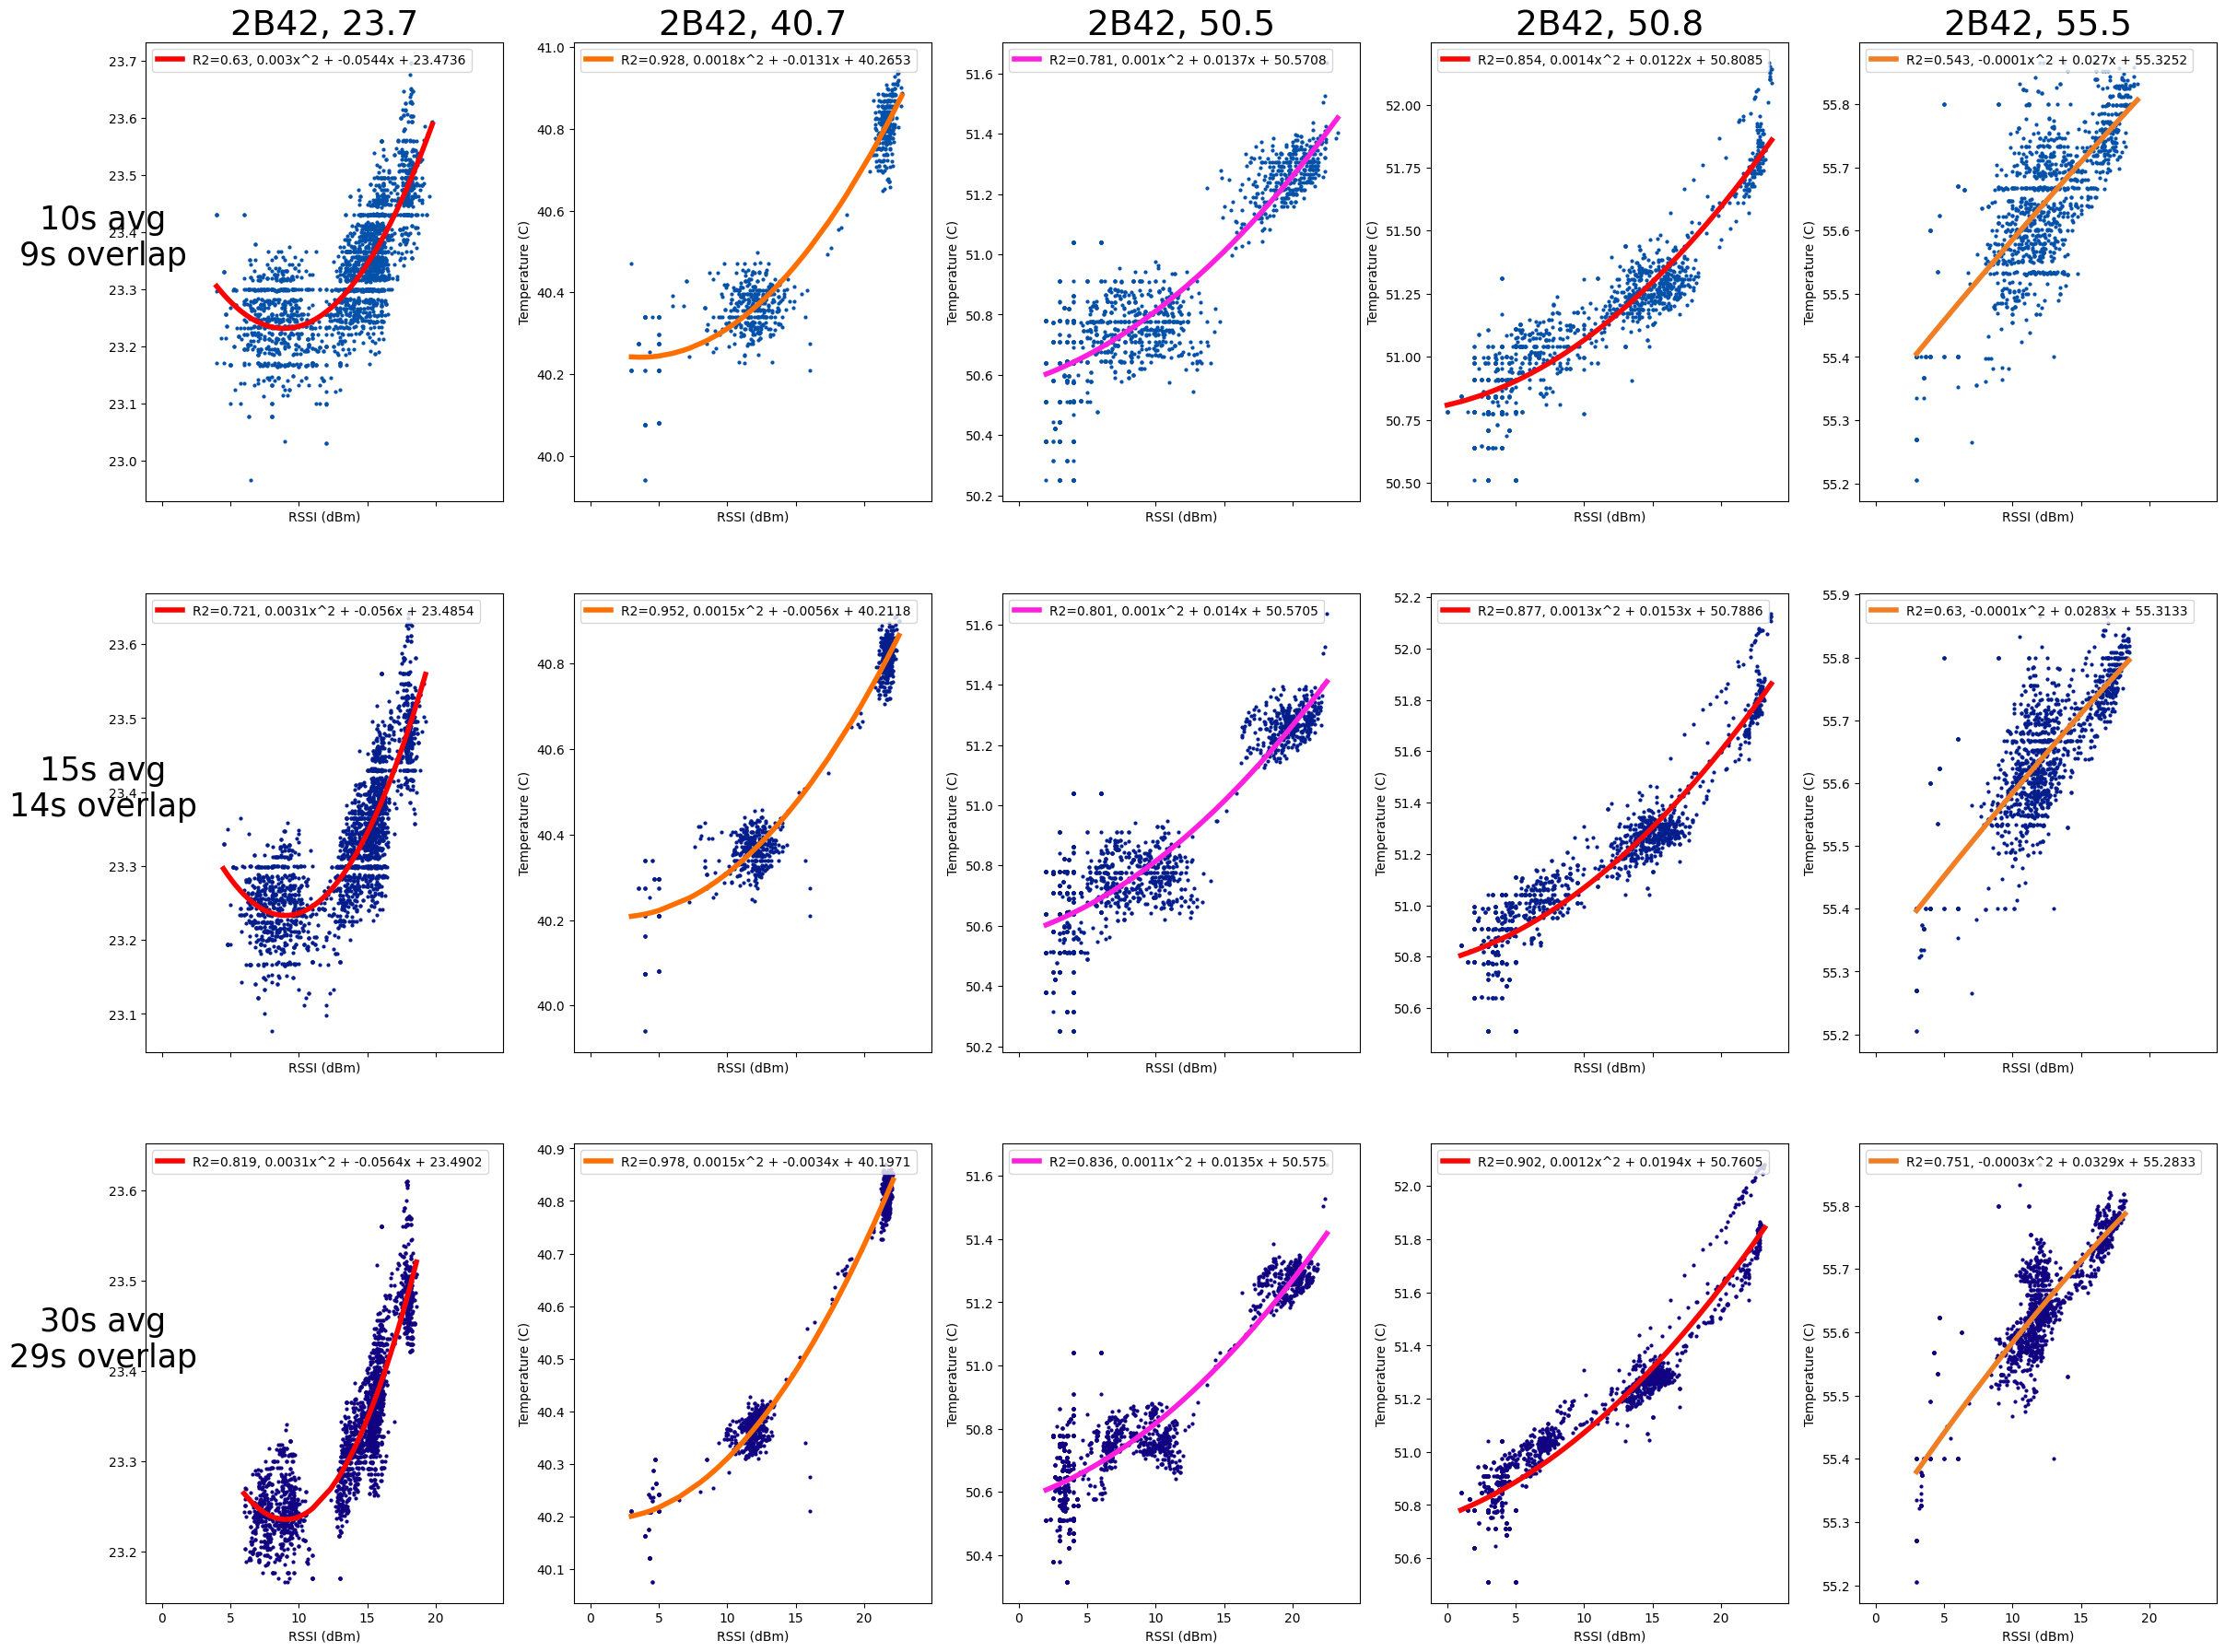

In [3]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10), (ax11, ax12, ax13, ax14, ax15)) = plt.subplots(3, 5, figsize=(29, 22), sharex=True)
axs = [ [ax1, ax2, ax3, ax4, ax5], [ax6, ax7, ax8, ax9, ax10], [ax11, ax12, ax13, ax14, ax15] ]

LABEL = ["23.7", "40.7", "50.5", "50.8", "55.5", "56.2 #1", "56.2 #2"]
TEMP = [temp23p7, temp40p7, temp50p5, temp50p8, temp55p5, temp56p2_1, temp56p2_2]
RSSI = [rssi23p7, rssi40p7, rssi50p5, rssi50p8, rssi55p5, rssi56p2_1, rssi56p2_2]
FITCOLOR = ["#ff0000", "#ff6f00", "#FF1FDF", "#fa0705", "#F07E25"]
RAWCOLOR = ["#0DA995", "#0024c2", "#0F78BC", "#008ec2", "#110063"]
TAG = "2B42"

for u in range(5):
    for k,v in TEMP[u].items():
        if k[-4:]==TAG:
            st, sr = sorted( TEMP[u][k].items() ), sorted( RSSI[u][k].items() )
            dt, tt, dr = [ j[1] for j in st ], [ j[0] for j in st ], [ j[1] for j in sr ]

            # Initialize arrays for time-averaging
            every, avgtime, avgdata, avgtemp      = [], [], [], []
            every2, avgtime2, avgdata2, avgtemp2  = [], [], [], []
            every3, avgtime3, avgdata3, avgtemp3  = [], [], [], []
            t0 = tt[0]
            while t0<tt[-1]:
                every .append([t0, t0 + datetime.timedelta(seconds=10)])
                every2.append([t0, t0 + datetime.timedelta(seconds=15)])
                every3.append([t0, t0 + datetime.timedelta(seconds=30)])
                t0 += datetime.timedelta(seconds=1)
            
            for j in range(len(every)):
                d_, t_ = [], []
                for time,data,temp_ in zip(tt, dr, dt):
                    if time>=every[j][0] and time<every[j][1]:
                        if data<100:
                            d_.append(data)
                            t_.append(temp_)
                if len(d_)>0:
                    avgtemp.append(sum(t_)/len(t_))
                    avgdata.append(sum(d_)/len(d_))
                    avgtime.append(every[j])
            
            for j in range(len(every2)):
                d_, t_ = [], []
                for time,data,temp_ in zip(tt, dr, dt):
                    if time>=every2[j][0] and time<every2[j][1]:
                        if data<100:
                            d_.append(data)
                            t_.append(temp_)
                if len(d_)>0:
                    avgtemp2.append(sum(t_)/len(t_))
                    avgdata2.append(sum(d_)/len(d_))
                    avgtime2.append(every2[j])
            
            for j in range(len(every3)):
                d_, t_ = [], []
                for time,data,temp_ in zip(tt, dr, dt):
                    if time>=every3[j][0] and time<every3[j][1]:
                        if data<100:
                            d_.append(data)
                            t_.append(temp_)
                if len(d_)>0:
                    avgtemp3.append(sum(t_)/len(t_))
                    avgdata3.append(sum(d_)/len(d_))
                    avgtime3.append(every3[j])

            avgtime, avgdata, avgtemp    = np.array(avgtime),  np.array(avgdata),  np.array(avgtemp)
            avgtime2, avgdata2, avgtemp2 = np.array(avgtime2), np.array(avgdata2), np.array(avgtemp2)
            avgtime3, avgdata3, avgtemp3 = np.array(avgtime3), np.array(avgdata3), np.array(avgtemp3)
            del every, t0, d_, t_, every2, every3

            # ax1.scatter(avgdata, avgtemp, color=RAWCOLOR[3 + u], s=10)
            # dr = movingavg(dr, 10)
            # dt = movingavg(dt, 10)
            # ax1.scatter( dr, dt, color=RAWCOLOR[u], s=9 )
            # model = np.poly1d( np.polyfit(dr,  dt, 2) )

            model  = np.poly1d( np.polyfit(avgdata, avgtemp,   2) )
            model2 = np.poly1d( np.polyfit(avgdata2, avgtemp2, 2) )
            model3 = np.poly1d( np.polyfit(avgdata3, avgtemp3, 2) )

            # ax1.scatter(avgdata,  avgtemp,  color='b', s=9)
            # ax2.scatter(avgdata2, avgtemp2, color='b', s=9)
            # ax3.scatter(avgdata3, avgtemp3, color='b', s=9)

            axs[0][u].scatter(avgdata,  avgtemp,  color='#0351A8', s=4)
            axs[1][u].scatter(avgdata2, avgtemp2, color='#031E8C', s=4)
            axs[2][u].scatter(avgdata3, avgtemp3, color='#110281', s=4)

            strmodel  = str(round(model[2], 4))+"x^2 + "+str(round(model[1], 4))+"x + "+str(round(model[0], 4))
            strmodel2 = str(round(model2[2], 4))+"x^2 + "+str(round(model2[1], 4))+"x + "+str(round(model2[0], 4))
            strmodel3 = str(round(model3[2], 4))+"x^2 + "+str(round(model3[1], 4))+"x + "+str(round(model3[0], 4))
            
            # linear fit
            # strmodel = str(round(model[1], 4))+"x + "+str(round(model[0], 4))
            # strmodel2 = str(round(model2[1], 4))+"x + "+str(round(model2[0], 4))
            # strmodel3 = str(round(model3[1], 4))+"x + "+str(round(model3[0], 4))

            x1, y1 = zip( *sorted( zip(avgdata,  model(avgdata)) ) )
            x2, y2 = zip( *sorted( zip(avgdata2, model2(avgdata2)) ) )
            x3, y3 = zip( *sorted( zip(avgdata3, model3(avgdata3)) ) )

            r1 = round(r2_score(avgtemp, model(avgdata)), 3)
            r2 = round(r2_score(avgtemp2, model2(avgdata2)), 3)
            r3 = round(r2_score(avgtemp3, model3(avgdata3)), 3)

            axs[0][u].plot(
                x1, y1, color=FITCOLOR[u], label="R2=" + str(r1) + ", " + strmodel, linewidth=4
            )

            axs[1][u].plot(
                x2, y2, color=FITCOLOR[u], label="R2=" + str(r2) + ", " + strmodel2, linewidth=4
            )

            axs[2][u].plot(
                x3, y3, color=FITCOLOR[u], label="R2=" + str(r3) + ", " + strmodel3, linewidth=4
            )

for a in np.array(axs).flatten():
    a.legend(loc="upper left")
    a.set_xlabel("RSSI (dBm)")
    a.set_ylabel("Temperature (C)")

ax1.set_title(TAG + ", " + LABEL[0], fontsize=27)
ax2.set_title(TAG + ", " + LABEL[1], fontsize=27)
ax3.set_title(TAG + ", " + LABEL[2], fontsize=27)
ax4.set_title(TAG + ", " + LABEL[3], fontsize=27)
ax5.set_title(TAG + ", " + LABEL[4], fontsize=27)

ax1.set_ylabel ("10s avg\n9s overlap",  fontsize=25, rotation=0)
ax6.set_ylabel ("15s avg\n14s overlap", fontsize=25, rotation=0)
ax11.set_ylabel("30s avg\n29s overlap", fontsize=25, rotation=0)